# General Analysis of Suicide Rates

The aim is to make general analysis of suicide rates.


* Dataset : https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
* Note: This project not finished yet.

# Content
1. Load and Check Data
1. Variable Description
1. Basic Data Analysis
1. Question

# 1) Load and Check Data

In [1]:
# Dictionaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Data load
df=pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
# renaming column name, I did this because there may be problems for future analysis.
df=df.rename(columns={'country':'Country','year':'Year','sex':'Sex','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYear','gdp_per_capita ($)':'GdpPerCapita','generation':'Generation'})
df.head()

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,GdpForYear,GdpPerCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# 2) Variable Description

1. Country
1. Year
1. Sex
1. Age
1. SuicidesNo
1. Population
1. Suicides100kPop
1. CountryYear
1. HDIForYear ** Human Developing index
1. GdpForYear ** Gross Domestic Product (Money)
1. GdpPerCapita ** Gross Domestic Product per person(Money)
1. Generation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
Country            27820 non-null object
Year               27820 non-null int64
Sex                27820 non-null object
Age                27820 non-null object
SuicidesNo         27820 non-null int64
Population         27820 non-null int64
Suicides100kPop    27820 non-null float64
CountryYear        27820 non-null object
HDIForYear         8364 non-null float64
GdpForYear         27820 non-null object
GdpPerCapita       27820 non-null int64
Generation         27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


##### We understand that there is no null data except "HDI for year"
* float64(2): Suicides100kPop, HDIForYear
* int64(4): Year,SuicidesNo,Population,GdpPerCapita
* object(6): Country,Sex,Age,CountryYear,GdpForYear,Generation

## 3) Basic Data Analysis
* Categorical Variable: Country, Year, Sex, CountryYear, Generation
* Numerical Variable: Age, SuicidesNo, Population, Suicides100kPop, HDIForYear, GdpForYear, GdpPerCapita

### a) Mean of suicide according to Age and Sex

In [7]:
a=df.drop(['HDIForYear','GdpPerCapita','Population','Year','Suicides100kPop'],axis=1)
a=a.groupby(by=["Age","Sex"]).mean()
a

SuicidesNo
Age         Sex               
15-24 years female   75.586816
            male    272.772512
25-34 years female   89.971133
            male    394.264972
35-54 years female  218.109866
            male    838.392072
5-14 years  female    7.373970
            male     15.300217
55-74 years female  185.280483
            male    529.257648
75+ years   female   95.641534
            male    185.753555

* As you can see,the rate for the age group 5-14 is very low, but for the age group 35-54 it is very high.
* **Gördüğünüz gibi 5-14 yaş ortalamasında intihar oranı çok düşük, ama 35-54 yaş grubu için bu oran çok yüksek.**

* It is observed from this table that men are more likely to commit suicide than women.
* **Bu Tablodan erkeklerin kadınlara göre daha çok intihara meyilli olduğu gözlenmektedir.**



### b)Total suicide by Year

In [8]:
b=df.groupby(by="Year").sum()
b=b.drop(['Suicides100kPop','HDIForYear','GdpPerCapita','Population'],axis=1)
nyytotal=b.iloc[:15]
tyytotal=b.iloc[15:]

In [9]:
print("Before 2000s Total Suicide : ",int(nyytotal.sum()))
print("After 2000s Total Suicide : ",int(tyytotal.sum()))

Before 2000s Total Suicide :  2938051
After 2000s Total Suicide :  3810369


* As we can see from the results, the number of suicides has increased after the 2000s.
* **Sonuçlardan gördüğümüz üzere 2000'lerden sonra intihar sayıları artmış.**

In [10]:
# 2016  en düşük intihar sayısına sahip yıldır
# Year 2016 has the lowest number of suicides.
b.sort_values(by="SuicidesNo").head()

,SuicidesNo
Year,
2016,15603
1985,116063
1986,120670
1988,121026
1987,126842


D:\Programlar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Programlar\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


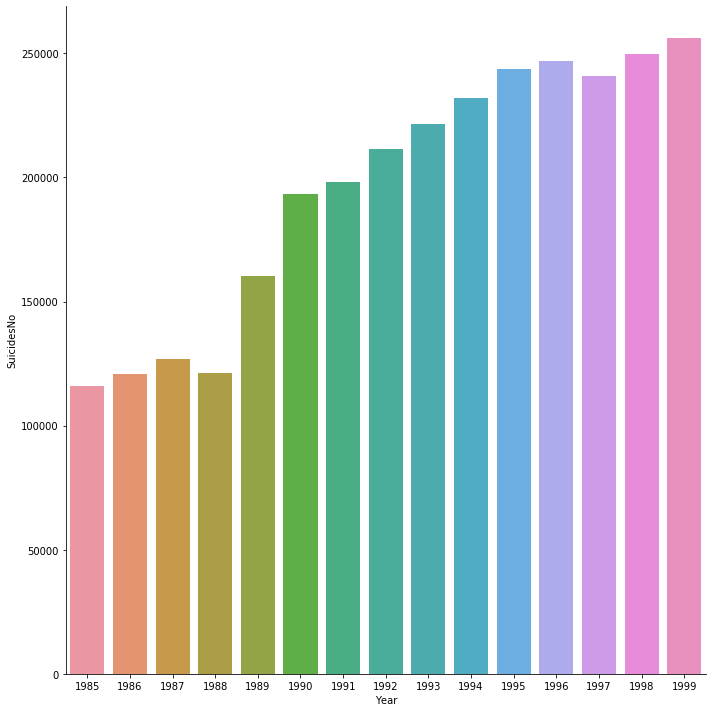

In [11]:
nyytotal=nyytotal.reset_index()
yearsuicide=sns.factorplot(data=nyytotal,x="Year",y="SuicidesNo",kind="bar",size=10)
plt.show()

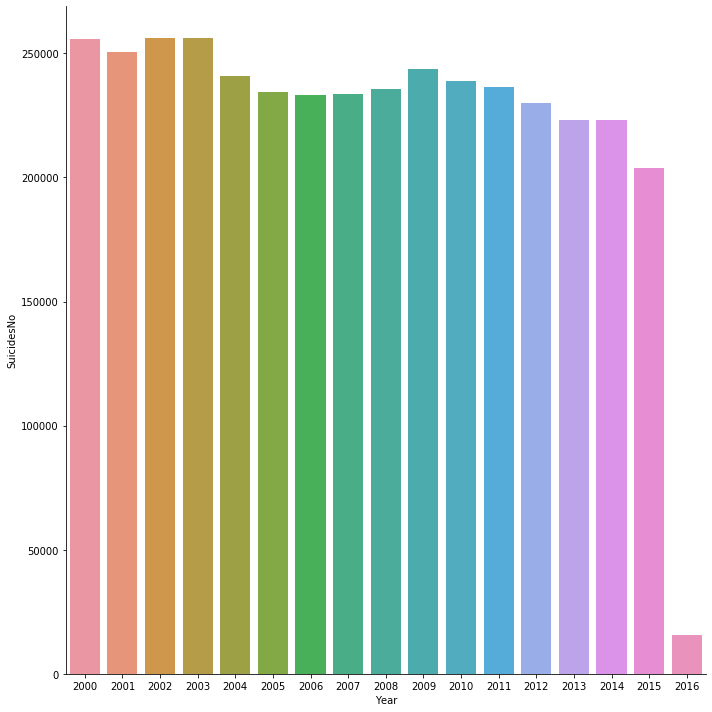

In [12]:
tyytotal=tyytotal.reset_index()
yearsuicide=sns.factorplot(data=tyytotal,x="Year",y="SuicidesNo",kind="bar",size=10)
plt.show()

* Probably our data set has no all data about 2016 that's why 2016 has lowest number
* After 2009 Total suicide has started to decrease
* Suicide rate steadily increased until 2001

### c) Total Suicide according to Year and Sex
#### Female

In [13]:
d=df[(df["Sex"] == "female")].groupby(by="Year").sum()
d=d.drop(['Suicides100kPop','HDIForYear','GdpPerCapita','Population'],axis=1)
nyy=d.iloc[:15]
tyy=d.iloc[15:]
print("For Female Total suicide Before the 2000's: ",nyy.sum().sum())
print("For Female Total suicide After the 2000's: ",tyy.sum().sum())

For Female Total suicide Before the 2000's:  704942
For Female Total suicide After the 2000's:  854568


#### Male

In [14]:
d=df[(df["Sex"] == "male")].groupby(by="Year").sum()
d=d.drop(['Suicides100kPop','HDIForYear','GdpPerCapita','Population'],axis=1)
nyy=d.iloc[:15]
tyy=d.iloc[15:]
print("For Male suicide Before the 2000's: ",nyy.sum().sum())
print("For Male suicide After the 2000's: ",tyy.sum().sum())

For Male suicide Before the 2000's:  2233109
For Male suicide After the 2000's:  2955801


### d) Mean of the Country suicide ratios

* First 15 country that has big ratio for suicide

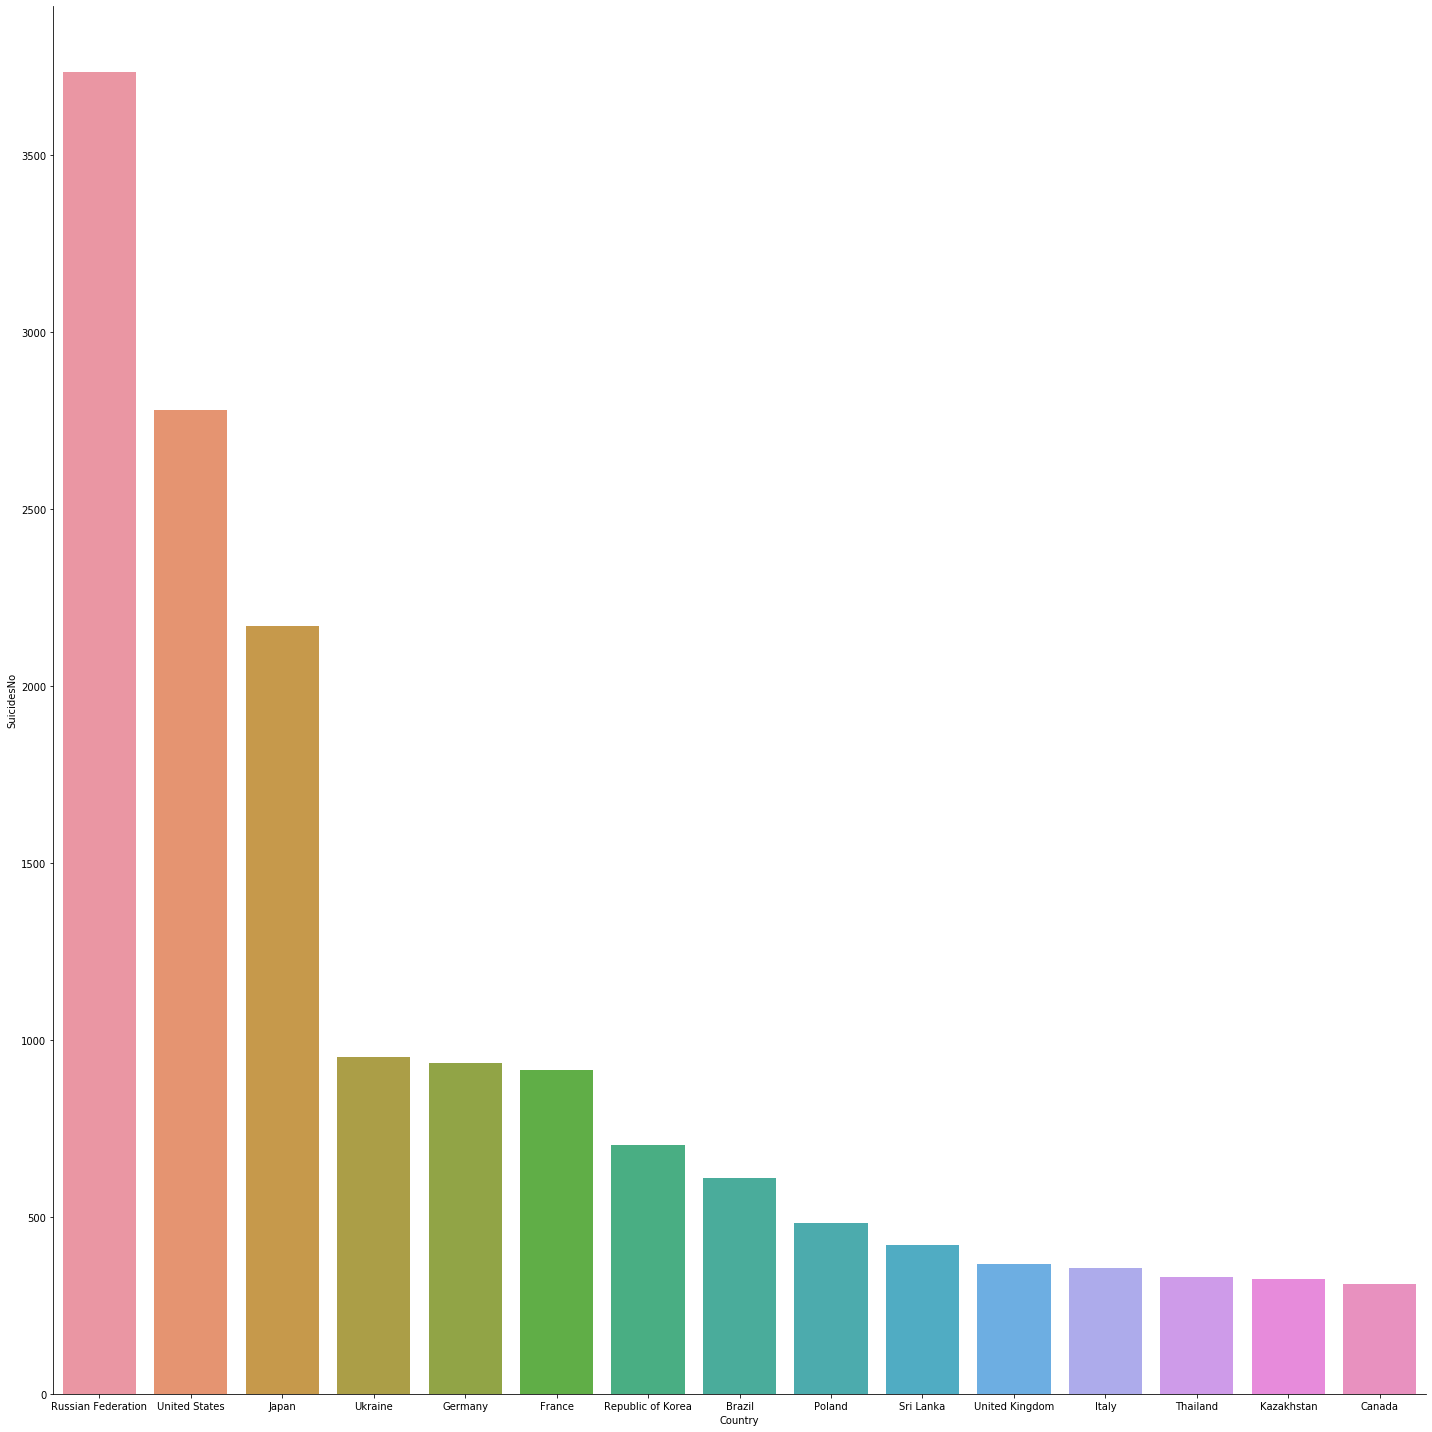

In [15]:
meancountry=df.groupby(by="Country").mean().sort_values(by="SuicidesNo" ,ascending=False)
meancountry=meancountry.reset_index().head(15)
sn=sns.factorplot(data=meancountry,x="Country",y="SuicidesNo",kind="bar",size=20)
plt.show()

## Question
#### Which country has big number for female suicide?
##### Hangi ülke en yüksek kadın intihar sayısına sahiptir

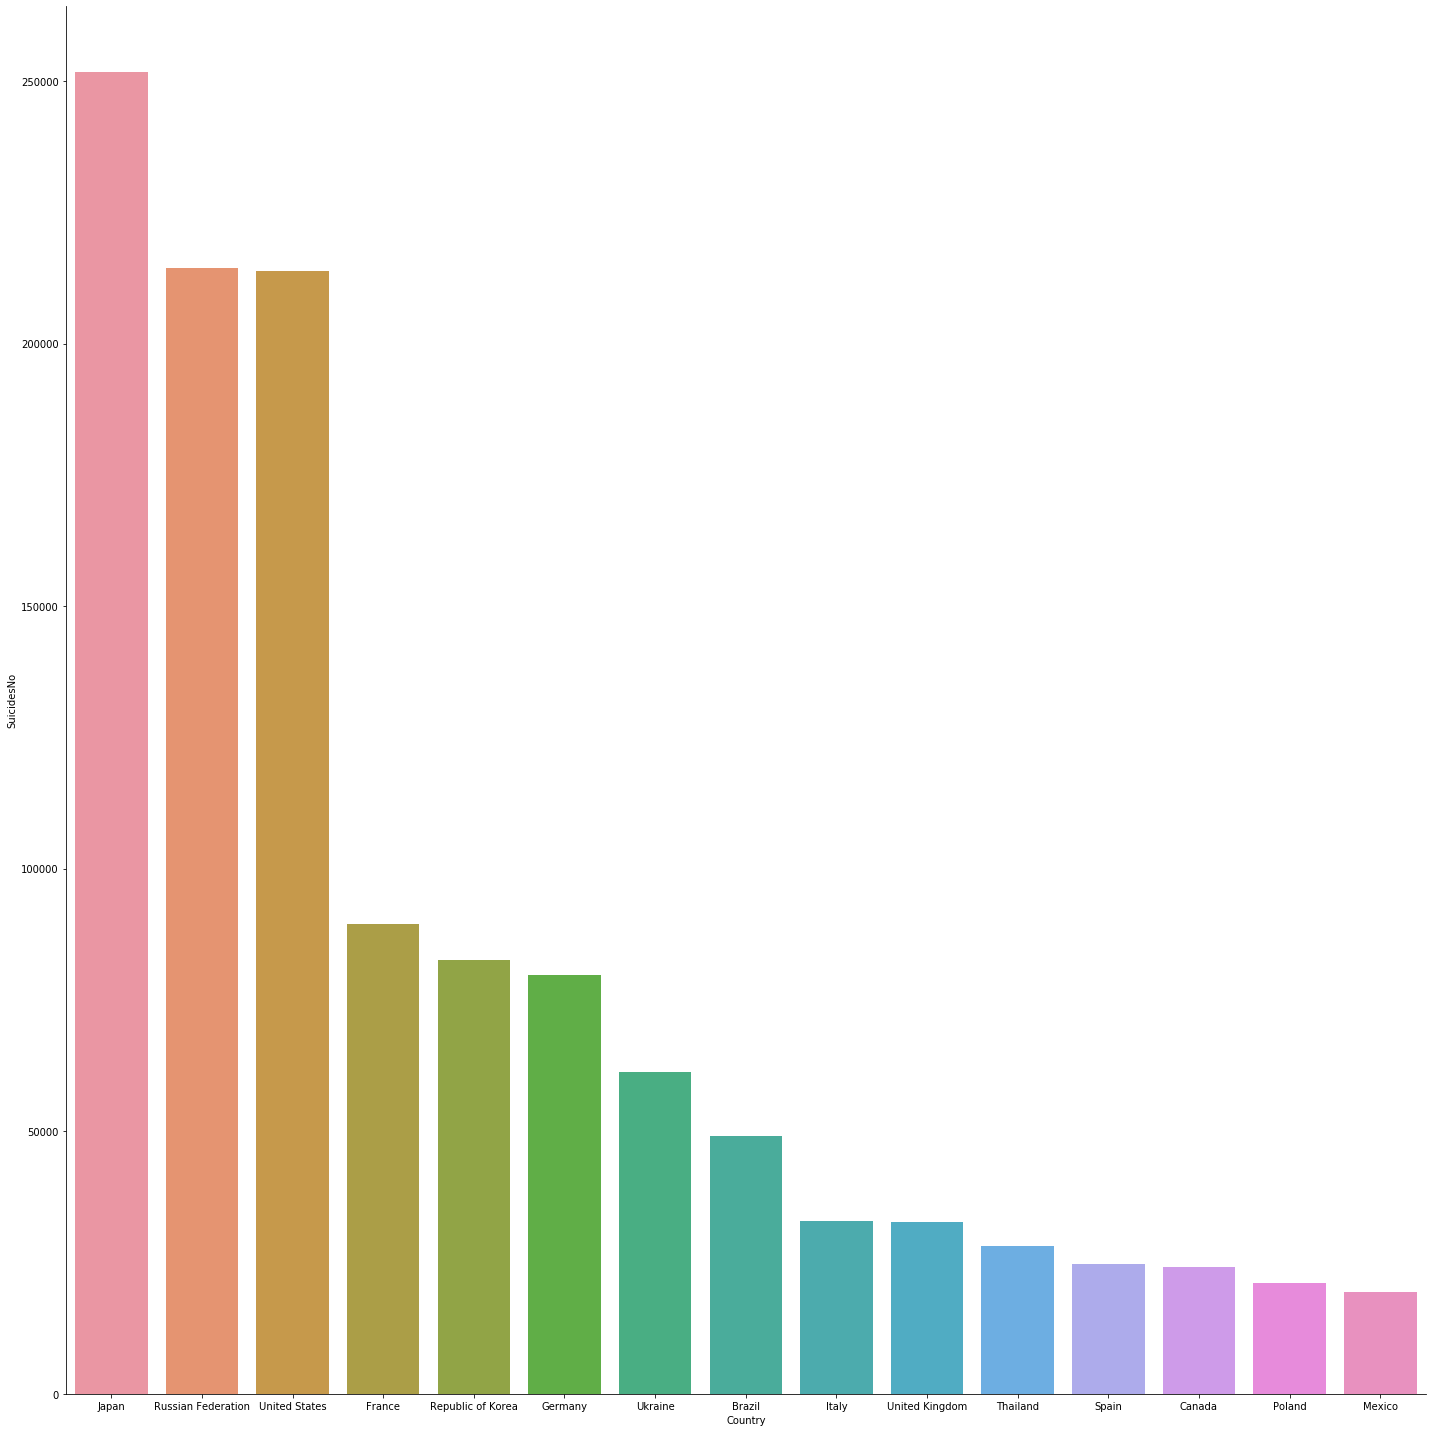

In [16]:
d=df[(df["Sex"] == "female")].groupby(by="Country").sum()
d=d.drop(['Suicides100kPop','HDIForYear','GdpPerCapita','Population','Year'],axis=1)
question=d.groupby(by="Country").mean().sort_values(by="SuicidesNo" ,ascending=False)
question=question.reset_index().head(15)
sn=sns.factorplot(data=question,x="Country",y="SuicidesNo",kind="bar",size=20)
plt.show()

* The country with the highest rate of suicide in women in the world is Japan.
* **Dünyada kadınlarda intihar oranının en yüksek olduğu ülke Japonya'dır.**